In [1]:
import matplotlib.pyplot as plt
import numpy as np

from dataset_reader import Traces_Dataset

In [2]:
dataset = Traces_Dataset('dataset_exp_test.csv')

#### Check Dataset

In [3]:
import torch
my_tensor = dataset.inputs
n_samples = my_tensor.shape[0]
print(f'There are {n_samples} samples!')

There are 30 samples!


In [4]:
# Check for NaN values
nan_mask = torch.isnan(my_tensor)

has_nan = torch.any(nan_mask)
if has_nan: 
    print('NaN values !!')
else: 
    print('Good!')

# Print the indices of NaN values
nan_indices = torch.nonzero(nan_mask)
print("Indices of NaN values:", nan_indices)

Good!
Indices of NaN values: tensor([], size=(0, 2), dtype=torch.int64)


IndexError: index 30 is out of bounds for dimension 0 with size 30

Error in callback <function _draw_all_if_interactive at 0x109b9aa70> (for post_execute):


KeyboardInterrupt: 

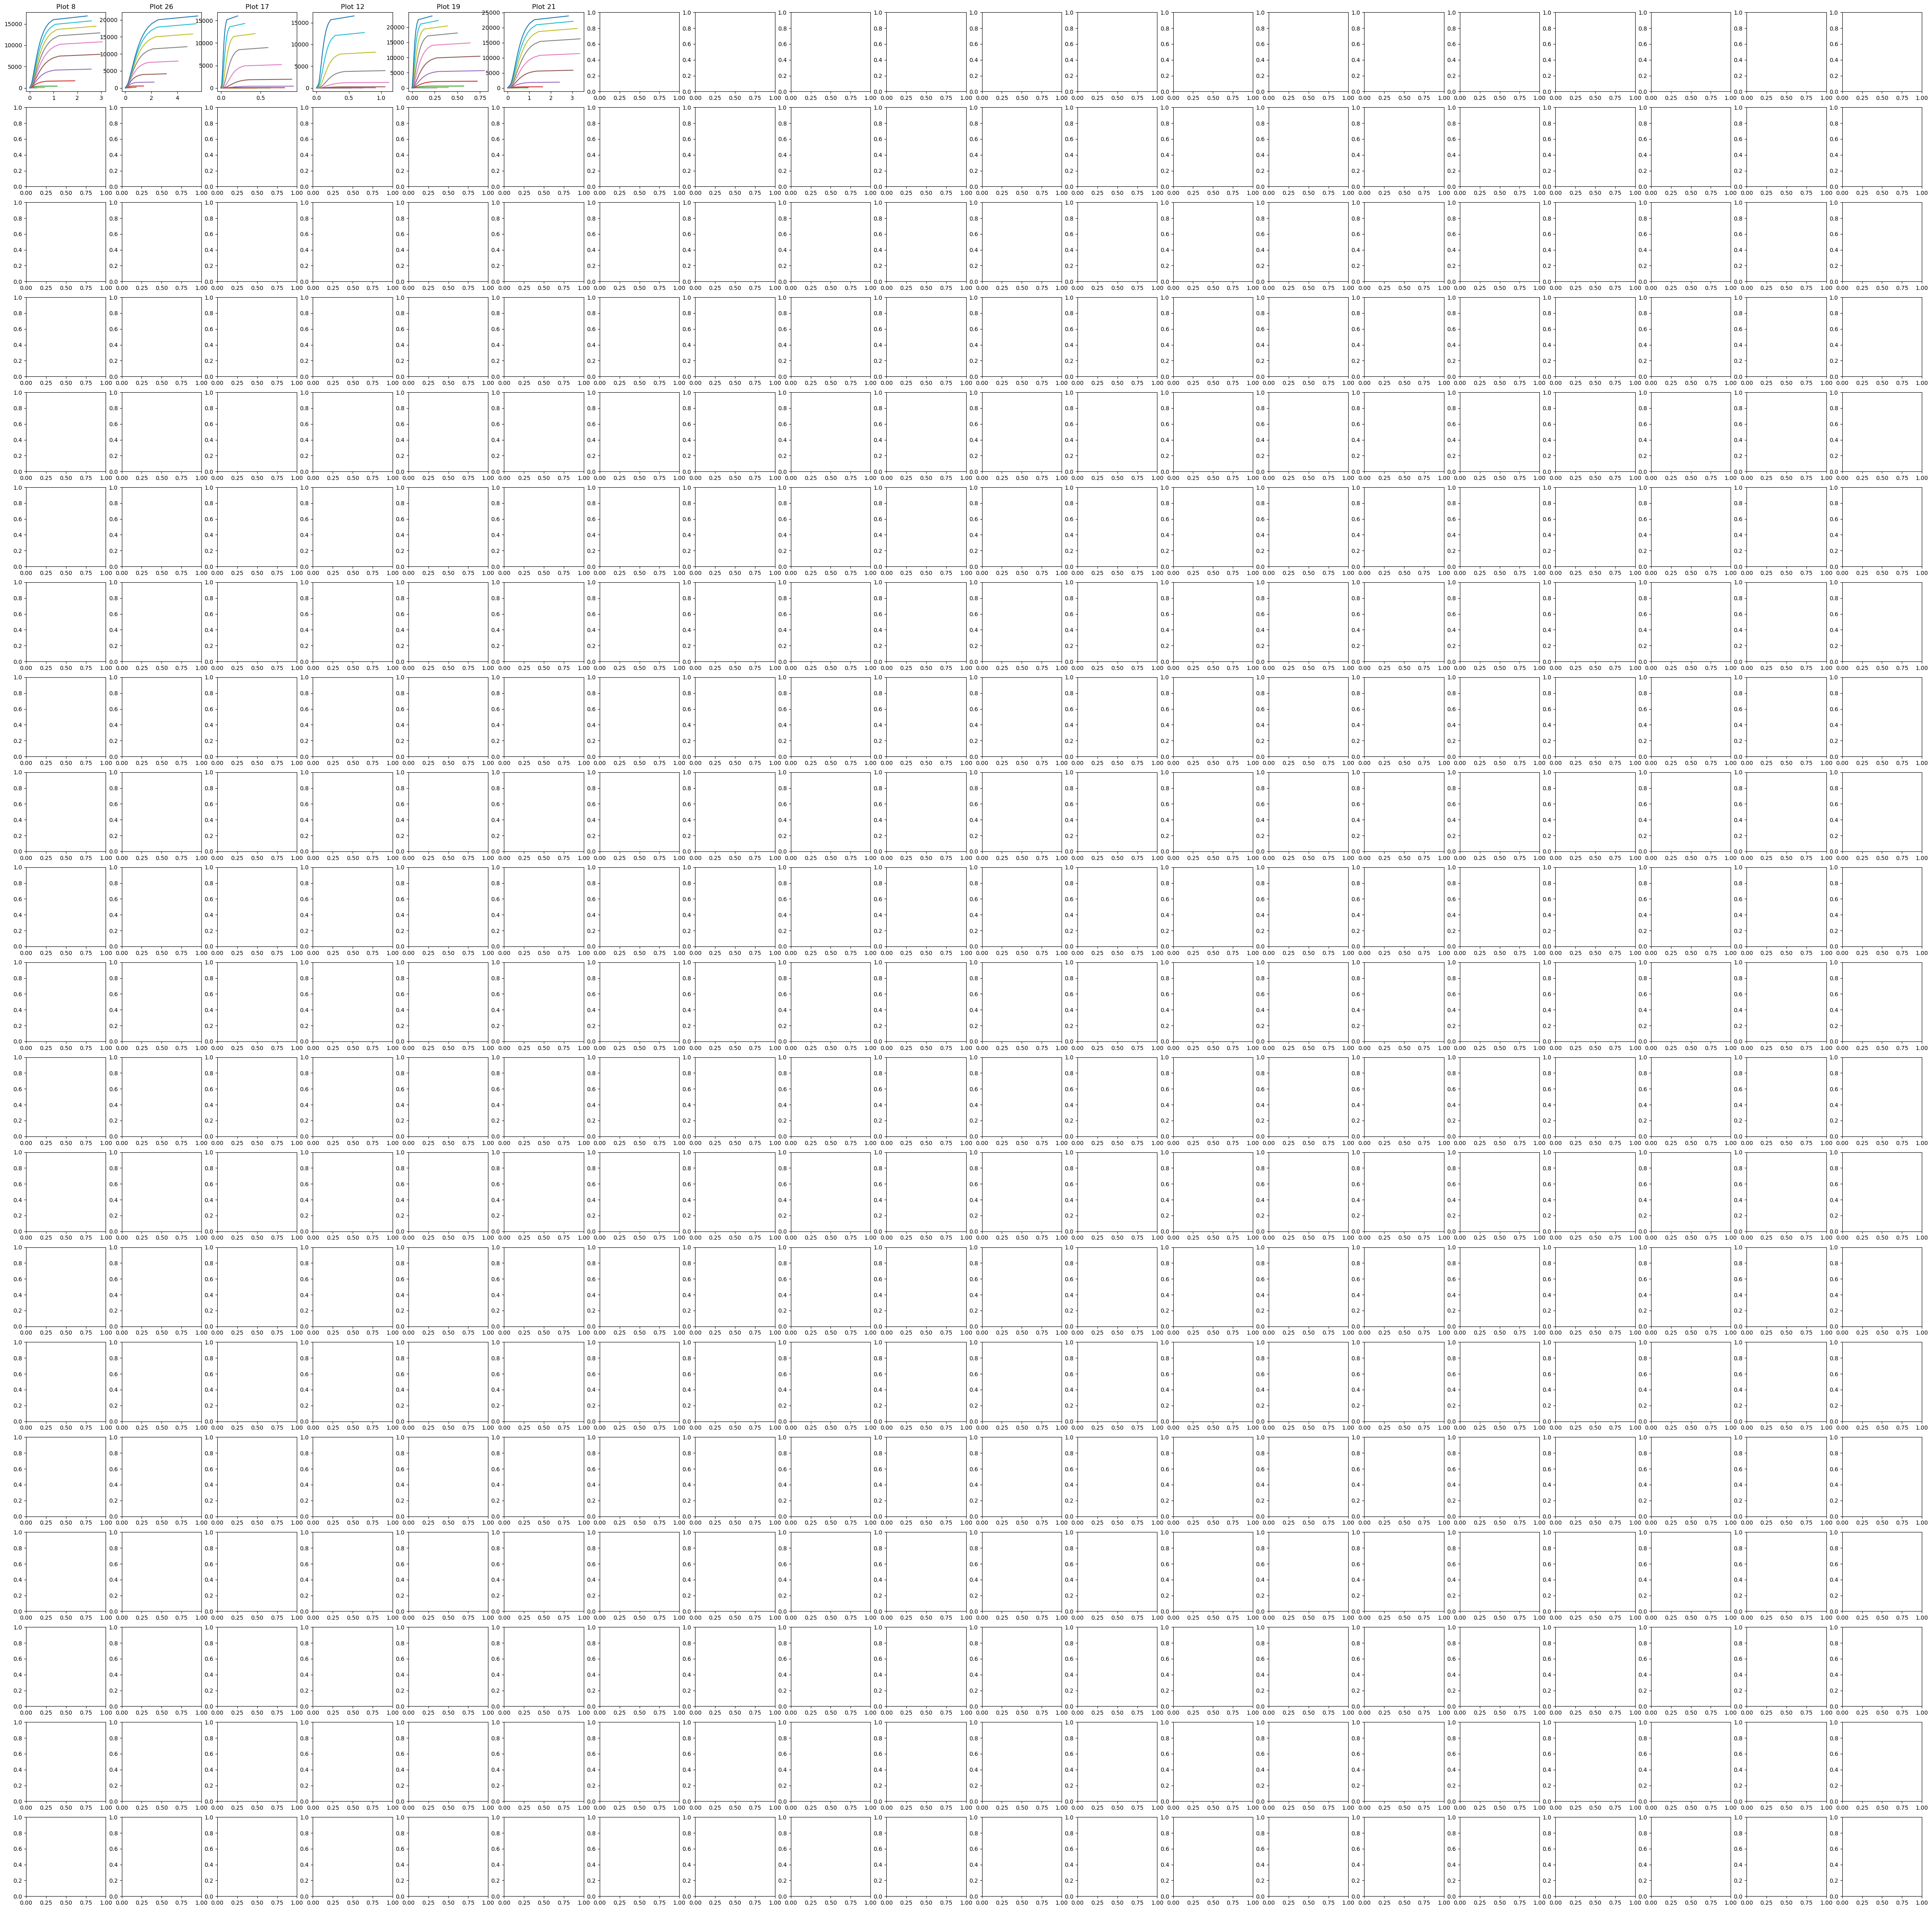

In [5]:
import random
# Generate example data (replace this with your actual data)
num_plots = 10

# Generate 100 random integers between 0 and 920049
random_samples = [random.randint(0, n_samples) for _ in range(400)]

# Set up the figure and axes
fig, axes = plt.subplots(20, 20, figsize=(60, 60))

# Flatten the axes to iterate over them
axes = axes.flatten()

# Plot multiple traces in each subplot
for i in range(num_plots):
    ax = axes[i]

    time_traces = dataset.time_traces[random_samples[i]]
    current_traces = dataset.current_traces[random_samples[i]]

    for j in range(11):
        ax.plot(time_traces[j], current_traces[j])
        ax.set_title(f'Plot {random_samples[i]}')

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Save the figure
# os.makedirs('data_combined_plots', exist_ok=True)
# plt.savefig(f'data_combined_plots/{n_samples}_dataset.png')


In [ ]:
current_traces_sim.shape

(11, 600)

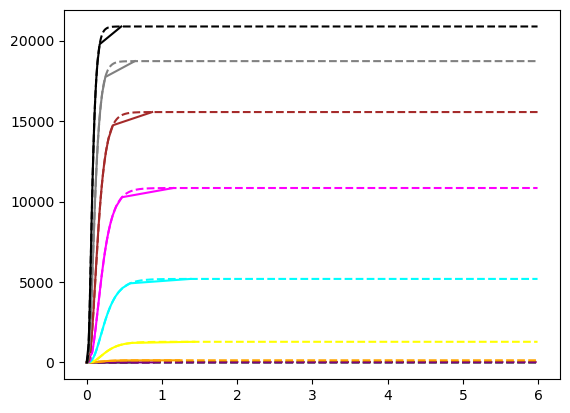

In [6]:
# compare samples and simulations using sample params
sample = 23

time_traces = dataset.time_traces[sample]
current_traces = dataset.current_traces[sample]

step_Vs = np.arange(dataset.step_V1[sample], dataset.step_V1[sample]+11*10, 10)

params_list = dataset.params[sample].tolist()
params = {'p': params_list[0], 'g_max': params_list[1], 'E_rev': params_list[2], 'a_m': params_list[3], 'b_m': params_list[4], 'delta_m': params_list[5], 's_m': params_list[6]}
sim_setup = {'prestep_V': dataset.prestep_V[sample].numpy(), 'step_Vs': step_Vs, 't': np.arange(0.0, 6.0, 0.01)}

from exp_hh_model import HH_model_exp
model = HH_model_exp(params, sim_setup)

current_traces_sim = model.simulation()
current_traces_sim.shape
step_Vs = sim_setup['step_Vs']

colors = ['blue', 'red', 'green', 'purple', 'orange', 'yellow', 'cyan', 'magenta', 'brown', 'gray', 'black']

for step in range(11): 
    plt.plot(time_traces[step], current_traces[step], color=colors[step])
    plt.plot(sim_setup['t'], current_traces_sim[step], linestyle='--', color=colors[step])

plt.show()

In [7]:
# sample = 22

# time_traces = dataset.time_traces[sample]
# current_traces = dataset.current_traces[sample]

# for j in range(11):
#     plt.plot(time_traces[j], current_traces[j], label = f'{j}')

# plt.title(f'prestep_V: {dataset.inputs[sample][0]}mV; step_V1: {dataset.inputs[sample][1]}mV')
# plt.legend()
# plt.show()

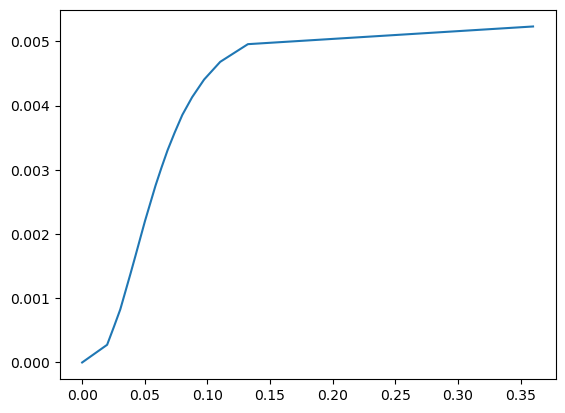

In [8]:
j = 1
plt.plot(time_traces[j], current_traces[j], label = f'{j}')

In [9]:
# params_list = dataset.params[sample].tolist()
# params = params = {'p': params_list[0], 'g_max': params_list[1], 'E_rev': params_list[2], 'a_m': params_list[3], 'b_m': params_list[4], 'delta_m': params_list[5], 's_m': params_list[6]}
# sim_setup = {'prestep_V': -100, 'step_Vs': np.linspace(0, 100, 11), 't': np.arange(0.0, 6.0, 0.01)}

# from exp_hh_model import HH_model_exp
# model = HH_model_exp(params, sim_setup)

In [10]:
current_traces_sim.shape

(11, 600)

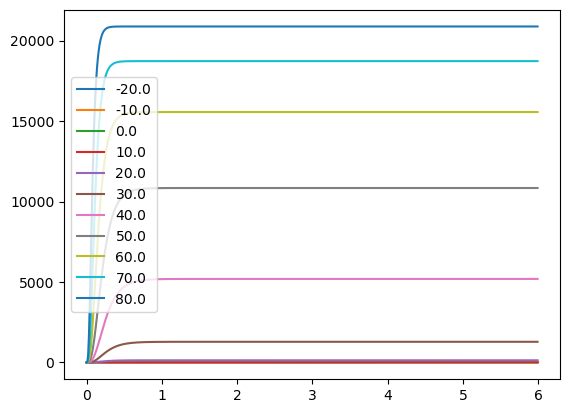

In [11]:
current_traces_sim = model.simulation()
current_traces_sim.shape
step_Vs = sim_setup['step_Vs']

for step in range(len(step_Vs)): 
    plt.plot(sim_setup['t'], current_traces_sim[step], label = f'{step_Vs[step]}')
    
plt.legend()

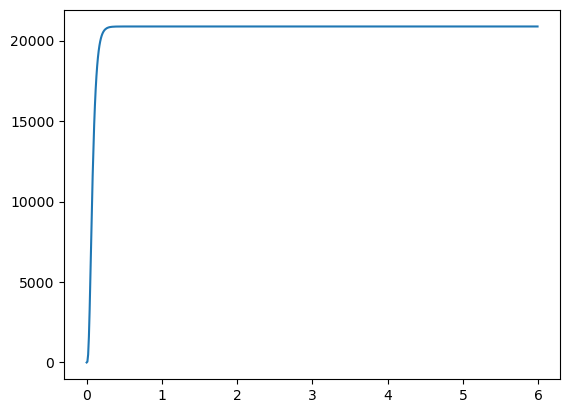

In [12]:
# plot a particular trace
trace = 10
plt.plot(sim_setup['t'], current_traces_sim[trace])
# plt.xlim(0, 0.4)

In [13]:
print(model.check_current_ss())
model.max_index_array

True


/Users/maxwellyue/Documents/GitHub/Compute-Canada-Research/Exponential_Rates_varing_exp_setup/exp_hh_model.py:85: RuntimeWarning: divide by zero encountered in divide
  diff_arr = np.abs((self.current_traces[i, :][1:] - self.current_traces[i, :][:-1]) / (self.current_traces[i, :][:-1] - self.current_traces[i, :][0]))


array([ 22,  36,  58,  89, 123, 143, 138, 115,  87,  64,  46])

In [14]:
int(step_Vs[0])

-20

Text(0.5, 1.0, 'Activation Steady State Curve')

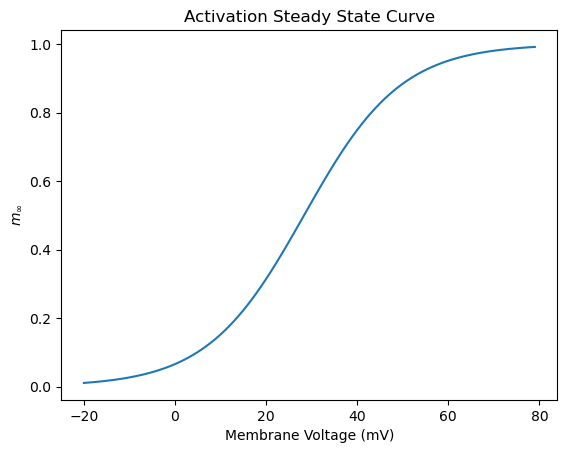

In [15]:
# get steady state curve/activation curve
plot_range = range(int(step_Vs[0]), int(step_Vs[-1]))

m_infty_curve = np.array([model.m_infty(V) for V in plot_range])

plt.plot(plot_range, m_infty_curve)

plt.xlabel('Membrane Voltage (mV)')
plt.ylabel('$m_\infty$')
plt.title('Activation Steady State Curve')

Text(0.5, 1.0, 'Activation Time Constant Curve')

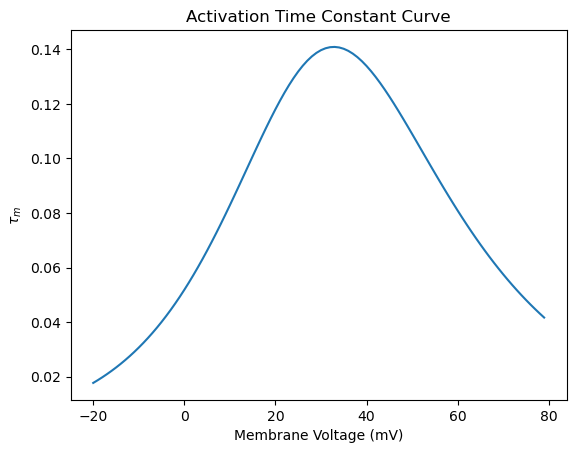

In [16]:
# get the time constant curve
time_constant_curve = np.array([model.tau_m(V) for V in plot_range])# / (0.63)

plt.plot(plot_range, time_constant_curve)

plt.xlabel('Membrane Voltage (mV)')
plt.ylabel('$\u03C4_m$')
plt.title('Activation Time Constant Curve')

#### Test the dataset generator

The sample data and sample params simulations do NOT match, trying to debug

In [1]:
import numpy as np
import os
from exp_generate_data import exp_formalism_data_generator
from exp_hh_model import HH_model_exp

params_bounds = {'p': (1, 4), 
                 'g_max': (100, 140), 
                 'E_rev': (-100, -60), 
                 'a_m': (0, 100), 
                 'b_m': (0, 100), 
                 'delta_m': (0, 1), 
                 's_m': (-100, 0)}
sim_setup = {'prestep_V': -100, 'step_Vs': np.linspace(-20, 100, 11), 't': np.arange(0.0, 6.0, 0.01)}

data_generator = exp_formalism_data_generator(params_bounds, sim_setup)
data_generator.generate_data(10)

/lustre06/project/6000803/maxwell8/Compute-Canada-Research/Exponential Rates/exp_hh_model.py:85: RuntimeWarning: divide by zero encountered in divide
  diff_arr = np.abs((self.current_traces[i, :][1:] - self.current_traces[i, :][:-1]) / (self.current_traces[i, :][:-1] - self.current_traces[i, :][0]))
/lustre06/project/6000803/maxwell8/Compute-Canada-Research/Exponential Rates/exp_hh_model.py:31: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp((V - self.V_2m) / self.s_m))
/lustre06/project/6000803/maxwell8/Compute-Canada-Research/Exponential Rates/exp_hh_model.py:61: RuntimeWarning: overflow encountered in divide
  return self.m_infty(V) + (self.m_infty(self.prestep_V) - self.m_infty(V)) * np.exp(- self.t / self.tau_m(V))
/lustre06/project/6000803/maxwell8/Compute-Canada-Research/Exponential Rates/exp_hh_model.py:61: RuntimeWarning: divide by zero encountered in divide
  return self.m_infty(V) + (self.m_infty(self.prestep_V) - self.m_infty(V)) * np.exp(- self.t / se

[ 48  63  80  97 110 111 100  82  62  44  31]
[25 36 49 64 76 81 76 66 53 42 32]
[ 25  44  74 119 177 240 297 338 364 378 384]
[ 20  40  72 102 110  99  83  67  53  42  34]
[ 21  34  52  76 102 125 139 144 141 133 124]
[ 57  87 127 168 186 165 123  82  53  33  21]
[ 26  41  65  96 131 162 180 185 179 168 154]
[21 29 39 50 60 64 61 52 42 32 24]
[29 39 52 66 78 87 87 81 70 58 47]
[ 26  39  59  84 111 134 144 140 128 112  95]


(10, 447)

In [16]:
# time end points correct 
t_traces = np.reshape(data_generator.dataset[:, 0:220], (-1, 11,20))
i_traces = np.reshape(data_generator.dataset[:, 220:440], (-1, 11,20))
t_traces.shape, i_traces.shape

((10, 11, 20), (10, 11, 20))

In [46]:
i_traces[sample][-2]

array([5.71374723e-03, 8.24844324e+02, 1.64968293e+03, 2.47452154e+03,
       3.29936015e+03, 4.12419876e+03, 4.94903737e+03, 5.77387598e+03,
       6.59871459e+03, 7.42355320e+03, 8.24839181e+03, 9.07323042e+03,
       9.89806903e+03, 1.07229076e+04, 1.15477463e+04, 1.23725849e+04,
       1.31974235e+04, 1.40222621e+04, 1.48471007e+04, 1.56719393e+04])

In [47]:
current_traces_sim[-2][0]

0.005781704568629149

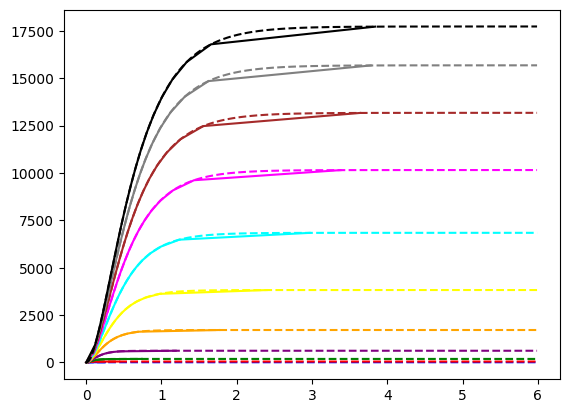

In [48]:
import matplotlib.pyplot as plt
# compare samples and simulations using sample params
sample = 2

t_trace = t_traces[sample]
i_trace = i_traces[sample]

params_list = data_generator.dataset[sample, 440:].tolist()
params = params = {'p': params_list[0], 'g_max': params_list[1], 'E_rev': params_list[2], 'a_m': params_list[3], 'b_m': params_list[4], 'delta_m': params_list[5], 's_m': params_list[6]}
sim_setup = {'prestep_V': -100, 'step_Vs': np.linspace(-20, 100, 11), 't': np.arange(0.0, 6.0, 0.01)}

from exp_hh_model import HH_model_exp
model = HH_model_exp(params, sim_setup)

current_traces_sim = model.simulation()
current_traces_sim.shape
step_Vs = sim_setup['step_Vs']

colors = ['blue', 'red', 'green', 'purple', 'orange', 'yellow', 'cyan', 'magenta', 'brown', 'gray', 'black']

for step in range(len(step_Vs)): 
    plt.plot(t_trace[step], i_trace[step], color=colors[step])
    plt.plot(sim_setup['t'], current_traces_sim[step], linestyle='--', color=colors[step])

plt.show()

In [27]:
np.linspace(0, 600, 20)

array([  0.        ,  31.57894737,  63.15789474,  94.73684211,
       126.31578947, 157.89473684, 189.47368421, 221.05263158,
       252.63157895, 284.21052632, 315.78947368, 347.36842105,
       378.94736842, 410.52631579, 442.10526316, 473.68421053,
       505.26315789, 536.84210526, 568.42105263, 600.        ])

#### Parameter Distribution

In [27]:
dataset.params.shape
p_arr = dataset.params[:, 0]
g_max_arr = dataset.params[:, 1]
E_rev_arr = dataset.params[:, 2]
a_m_arr = dataset.params[:, 3]
b_m_arr = dataset.params[:, 4]
delta_m_arr = dataset.params[:, 5]
s_m_arr = dataset.params[:, 6]

(array([0.44579448, 0.50798955, 0.54621597]),
 array([1.        , 1.66666663, 2.33333325, 3.        ]),
 <BarContainer object of 3 artists>)

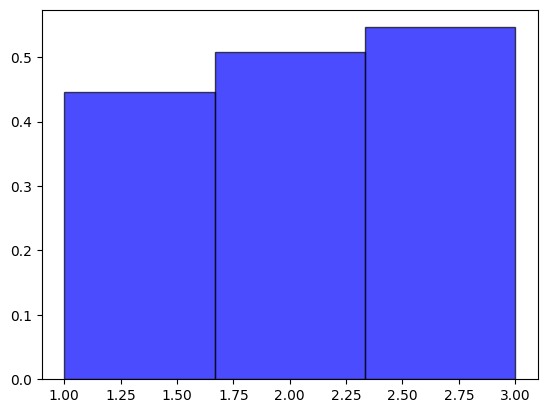

In [29]:
plt.hist(p_arr, bins=3, density=True, alpha=0.7, color='blue', edgecolor='black')

(array([0.0251053 , 0.02554   , 0.02428951, 0.02582948, 0.02443425,
        0.02482898, 0.02532947, 0.02403951, 0.02472419, 0.0244474 ,
        0.02502635, 0.02422418, 0.02518425, 0.02511846, 0.02623738,
        0.02402635, 0.02577684, 0.02521056, 0.02376319, 0.02514525,
        0.02463161, 0.02552684, 0.02548688, 0.02496056, 0.02461893,
        0.02581583, 0.02556631, 0.02405267, 0.02475004, 0.02548737,
        0.02475004, 0.02522372, 0.02456629, 0.02532898, 0.02602685,
        0.02526319, 0.02456583, 0.02451366, 0.02505267, 0.02590843,
        0.02557898, 0.02594741, 0.02451366, 0.0249474 , 0.02505315,
        0.02496056, 0.02432898, 0.02536894, 0.02431582, 0.02452635,
        0.02505315, 0.02514477, 0.02493472, 0.02393425, 0.02534214,
        0.02509262, 0.02481583, 0.02467156, 0.02539477, 0.02490793,
        0.02518473, 0.02518425, 0.02560579, 0.02430267, 0.02443425,
        0.02405313, 0.02492109, 0.02484262, 0.02393425, 0.02597372,
        0.02402681, 0.02582948, 0.02499956, 0.02

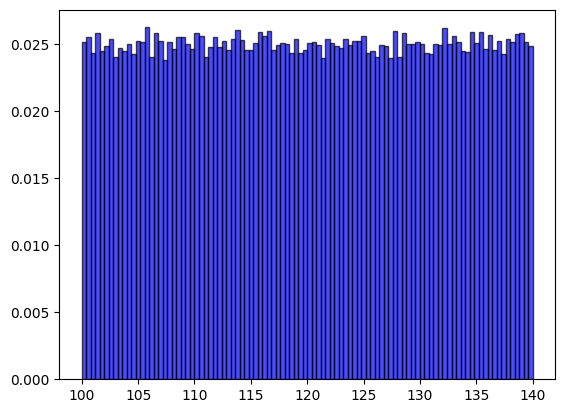

In [33]:
plt.hist(g_max_arr, bins=100, density=True, alpha=0.7, color='blue', edgecolor='black')

(array([0.02498712, 0.02438161, 0.0250858 , 0.02478951, 0.02538186,
        0.02463161, 0.0245858 , 0.02477635, 0.02436211, 0.02509214,
        0.02453974, 0.02489477, 0.02546081, 0.02448688, 0.02396079,
        0.02568425, 0.02546081, 0.02475661, 0.02543449, 0.02493425,
        0.02423053, 0.0249474 , 0.02492791, 0.02523688, 0.02570423,
        0.02551977, 0.0245858 , 0.02546056, 0.02434237, 0.02542109,
        0.02505291, 0.02447372, 0.0252108 , 0.02526319, 0.02515159,
        0.02405925, 0.02463185, 0.02513162, 0.02465159, 0.02546056,
        0.02503317, 0.02550662, 0.02560554, 0.02545398, 0.02525686,
        0.02594095, 0.0250791 , 0.02490805, 0.02461857, 0.02544753]),
 array([-99.99999237, -99.19999695, -98.3999939 , -97.59999847,
        -96.79999542, -96.        , -95.19999695, -94.40000153,
        -93.59999847, -92.80000305, -92.        , -91.20000458,
        -90.40000153, -89.6000061 , -88.80000305, -88.00000763,
        -87.20000458, -86.40000916, -85.6000061 , -84.80001068

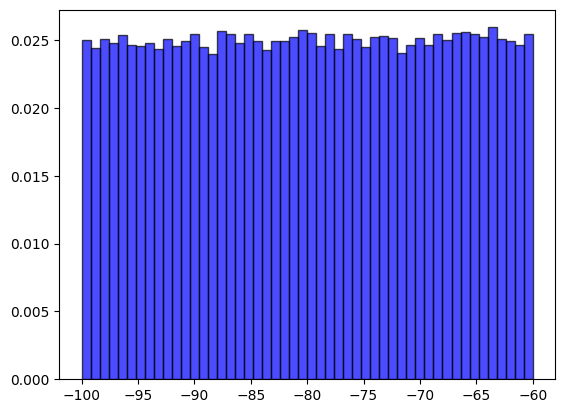

In [35]:
plt.hist(E_rev_arr, bins=50, density=True, alpha=0.7, color='blue', edgecolor='black')

(array([4.41701650e-02, 1.15456777e-01, 1.72867408e-01, 2.02949757e-01,
        2.50297564e-01, 2.71694139e-01, 2.97433584e-01, 3.23173223e-01,
        3.43934063e-01, 3.55691587e-01, 3.65860256e-01, 3.81749031e-01,
        3.90540230e-01, 3.89163691e-01, 4.00497527e-01, 4.12042717e-01,
        4.05264094e-01, 4.15644617e-01, 4.09394627e-01, 4.09501042e-01,
        4.09076857e-01, 4.12043211e-01, 4.16068312e-01, 4.22211887e-01,
        4.10241524e-01, 4.05899636e-01, 3.97531663e-01, 3.97002045e-01,
        3.86303751e-01, 3.71367617e-01, 3.65330857e-01, 3.72851440e-01,
        3.51984470e-01, 3.45099430e-01, 3.50077004e-01, 3.38108465e-01,
        3.32070814e-01, 3.18194809e-01, 3.11203844e-01, 3.08555752e-01,
        2.93196111e-01, 2.85782841e-01, 2.72435115e-01, 2.74659507e-01,
        2.69894247e-01, 2.59194683e-01, 2.54323425e-01, 2.37586299e-01,
        2.33349361e-01, 2.32503089e-01, 2.21380012e-01, 2.16190800e-01,
        2.05279647e-01, 1.97759082e-01, 1.88862418e-01, 1.831416

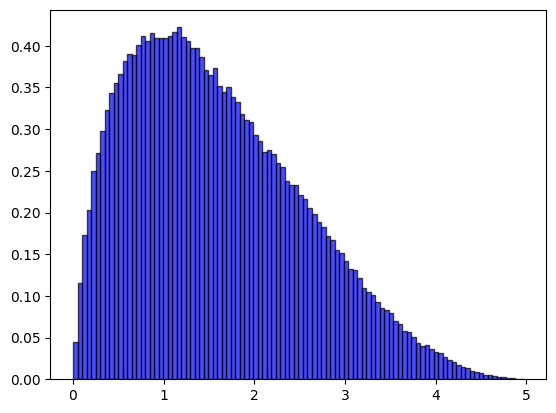

In [40]:
plt.hist(a_m_arr, bins=100, density=True, alpha=0.7, color='blue', edgecolor='black')

(array([9.59490932e-04, 3.09653892e-03, 5.75694749e-03, 8.43189001e-03,
        1.04962493e-02, 1.29822031e-02, 1.47558075e-02, 1.78668842e-02,
        1.98294662e-02, 2.09343614e-02, 2.37837293e-02, 2.76653401e-02,
        2.75635758e-02, 3.03257086e-02, 3.30733835e-02, 3.53412261e-02,
        3.66932835e-02, 3.76381877e-02, 3.97607489e-02, 4.25955542e-02,
        4.14180525e-02, 4.50524903e-02, 4.69858874e-02, 4.90649095e-02,
        4.81054180e-02, 4.97045706e-02, 5.23503033e-02, 5.46037926e-02,
        5.40077449e-02, 5.49672364e-02, 5.44146585e-02, 5.58104260e-02,
        5.73514276e-02, 5.67699175e-02, 5.74241163e-02, 5.56212887e-02,
        5.53742934e-02, 5.52725292e-02, 5.43275754e-02, 5.56067510e-02,
        5.43711886e-02, 5.30191778e-02, 5.40949714e-02, 5.28301870e-02,
        5.25539698e-02, 4.90646510e-02, 4.78873517e-02, 4.80327292e-02,
        4.73058417e-02, 4.65062654e-02, 4.43401405e-02, 4.46018200e-02,
        4.14907413e-02, 3.92226455e-02, 3.83796626e-02, 3.576286

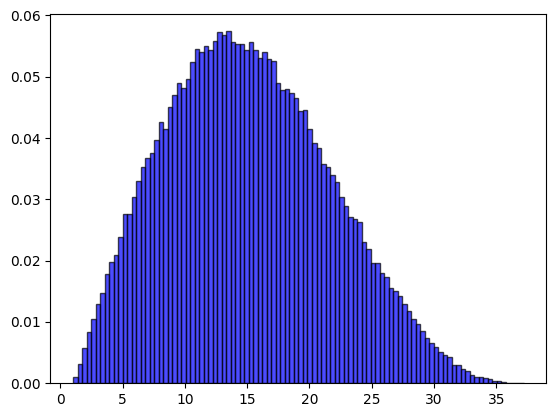

In [41]:
plt.hist(b_m_arr, bins=100, density=True, alpha=0.7, color='blue', edgecolor='black')

(array([0.429066  , 0.50592936, 0.53646411, 0.6128009 , 0.62122451,
        0.71440792, 0.77389833, 0.7796894 , 0.85444629, 0.90446076,
        0.93868076, 1.00448844, 1.10662114, 1.1666377 , 1.14663388,
        1.24718624, 1.2940432 , 1.3072028 , 1.41618024, 1.44671713,
        1.55306011, 1.5667481 , 1.62413477, 1.70152213, 1.76417362,
        1.81734085, 1.95054111, 1.9631762 , 2.00318132, 2.12901168,
        2.13269691, 2.1921871 , 2.17112215, 2.3011647 , 2.33591118,
        2.31695165, 2.33591118, 2.3411758 , 2.33274545, 2.33327887,
        2.31432624, 2.29747262, 2.22061604, 2.16165231, 2.19060118,
        2.17165508, 2.03161624, 2.06793594, 1.95580573, 1.85051336,
        1.66624675, 1.65835974, 1.58043373, 1.41038706, 1.33458474,
        1.20401464, 1.09766966, 1.0229184 , 0.92657007, 0.82496324,
        0.75178975, 0.64544029, 0.61595852, 0.56278938, 0.48381699,
        0.3922129 , 0.36852439, 0.31640262, 0.2742858 , 0.24375256,
        0.21584871, 0.18531401, 0.17425939, 0.15

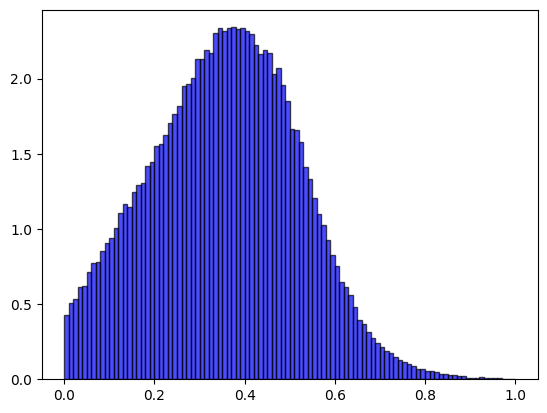

In [42]:
plt.hist(delta_m_arr, bins=100, density=True, alpha=0.7, color='blue', edgecolor='black')

(array([0.00426205, 0.00989405, 0.01430858, 0.02207134, 0.02597822,
        0.03084914, 0.03653188, 0.04333086, 0.04769527, 0.05018059,
        0.05555889, 0.05824805, 0.0672288 , 0.07012091, 0.07174586,
        0.07960904, 0.08214598, 0.09310554, 0.0917356 , 0.08838684,
        0.09407131, 0.09751981, 0.10299959, 0.10457249, 0.10934193,
        0.10776903, 0.11020652, 0.11548132, 0.11751087, 0.12126553,
        0.11725717, 0.12106258, 0.12040519, 0.12796304, 0.13202214,
        0.13029702, 0.13115958, 0.12461429, 0.12197812, 0.13212362,
        0.12938372, 0.13425464, 0.1353214 , 0.13694379, 0.13293543,
        0.13334257, 0.13181918, 0.13395021, 0.13192187, 0.1357768 ,
        0.13055072, 0.13319035, 0.12847043, 0.13126106, 0.12765978,
        0.13166697, 0.12578128, 0.1280657 , 0.12720196, 0.12527389,
        0.12243365, 0.12233104, 0.1256798 , 0.12050556, 0.11654683,
        0.11674978, 0.11253951, 0.11456802, 0.11055966, 0.11152472,
        0.11172665, 0.10883455, 0.10066654, 0.10

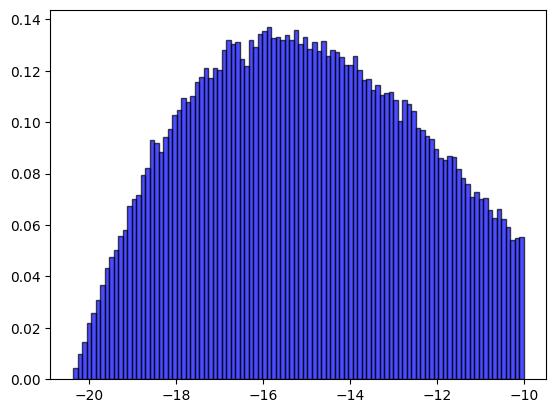

In [43]:
plt.hist(s_m_arr, bins=100, density=True, alpha=0.7, color='blue', edgecolor='black')

In [79]:
print(f'p in the samples ranging from {torch.min(p_arr).item()} to {torch.max(p_arr).item()}')
print(f'g_max in the samples ranging from {torch.min(g_max_arr).item()} to {torch.max(g_max_arr).item()}')
print(f'E_rev in the samples ranging from {torch.min(E_rev_arr).item()} to {torch.max(E_rev_arr).item()}')
print(f'a_m in the samples ranging from {torch.min(a_m_arr).item()} to {torch.max(a_m_arr).item()}')
print(f'b_m in the samples ranging from {torch.min(b_m_arr).item()} to {torch.max(b_m_arr).item()}')
print(f'delta_m in the samples ranging from {torch.min(delta_m_arr).item()} to {torch.max(delta_m_arr).item()}')
print(f's_m in the samples ranging from {torch.min(s_m_arr).item()} to {torch.max(s_m_arr).item()}')

p in the samples ranging from 1.0 to 3.0
g_max in the samples ranging from 100.00000762939453 to 139.99986267089844
E_rev in the samples ranging from -99.99999237060547 to -60.00003433227539
a_m in the samples ranging from 0.0028434735722839832 to 4.971691608428955
b_m in the samples ranging from 1.0190736055374146 to 37.22267150878906
delta_m in the samples ranging from 3.407005124245188e-06 to 0.9997321963310242
s_m in the samples ranging from -20.373111724853516 to -10.000028610229492
